Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

Mounted Google Drive, uploaded the dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Fenny Labs Intern/2/mcdonalds.csv")

In [3]:
df.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


Checking if there are any empty rows

In [4]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

Non-Numeric columns like VisitFrequence, Gender, and column Like which has some rows of textual data needs to be changed to numeric data for implementing clustering

In [5]:
df['VisitFrequency'].unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [6]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [7]:
df['Like'].unique()

array(['-3', '2', '1', '4', 'I love it!+5', 'I hate it!-5', '-2', '3',
       '0', '-4', '-1'], dtype=object)

Changing text to numeric data

In [8]:
df['Like'] = df['Like'].replace({'I love it!+5': '5', 'I hate it!-5': '-5'})

df['Like'] = pd.to_numeric(df['Like'])

print(df['Like'].unique())

[-3  2  1  4  5 -5 -2  3  0 -4 -1]


In [9]:
df['Gender'] = df['Gender'].replace({'Female':'0','Male':'1'})

df['Gender'] = pd.to_numeric(df['Gender'])

print(df['Gender'].unique())

[0 1]


In [10]:
mapping = {
    'Every three months': 1,
    'Once a week': 3,
    'Once a month': 2,
    'Once a year': 0.5,
    'More than once a week': 4,
    'Never': 0
}

df['VisitFrequency'] = df['VisitFrequency'].replace(mapping)
df['VisitFrequency'] = pd.to_numeric(df['VisitFrequency'])
print(df['VisitFrequency'].unique())

[1.  3.  2.  0.5 4.  0. ]


In [11]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,1.0,0
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,1.0,0
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,1.0,0
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,3.0,0
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,2.0,1


In [12]:
df.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-5,47,0.5,1
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,2,36,3.0,0
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,3,52,2.0,0
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,4,41,1.0,1
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,1.0,1


All the columns from yummy to disgusting has to be changed to numeric

In [13]:
map = {'Yes': 1, 'No': 0}

replacement = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
df[replacement] = df[replacement].replace(map)

In [14]:
print(df.head())

   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  Like  Age  VisitFrequency  Gender  
0        0           0    -3   61             1.0       0  
1        0           0     2   51             1.0       0  
2        1           0     1   62             1.0       0  
3        0           1     4   69             3.0       0  
4        1           0     2   49             2.0       1  


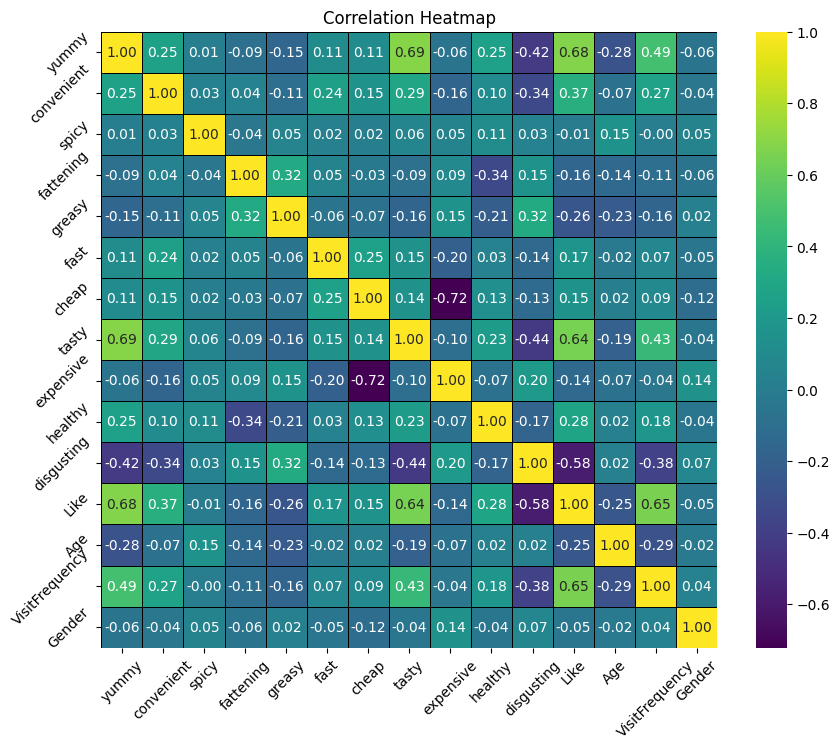

In [15]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, linecolor='black', square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlation Heatmap')
plt.show()


Now, we have to apply Feature Scaling because some variables like age have very high values as compared to the other varibale, so the model can become bias here.

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
sc2 = MinMaxScaler()
df_updated = pd.DataFrame(sc2.fit_transform(df), columns=df.columns)
print(df_updated.head())


   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0    0.0         1.0    0.0        1.0     0.0   1.0    1.0    0.0        1.0   
1    1.0         1.0    0.0        1.0     1.0   1.0    1.0    1.0        1.0   
2    0.0         1.0    1.0        1.0     1.0   1.0    0.0    1.0        1.0   
3    1.0         1.0    0.0        1.0     1.0   1.0    1.0    1.0        0.0   
4    0.0         1.0    0.0        1.0     1.0   1.0    1.0    0.0        0.0   

   healthy  disgusting  Like       Age  VisitFrequency  Gender  
0      0.0         0.0   0.2  0.811321            0.25     0.0  
1      0.0         0.0   0.7  0.622642            0.25     0.0  
2      1.0         0.0   0.6  0.830189            0.25     0.0  
3      0.0         1.0   0.9  0.962264            0.75     0.0  
4      1.0         0.0   0.7  0.584906            0.50     1.0  


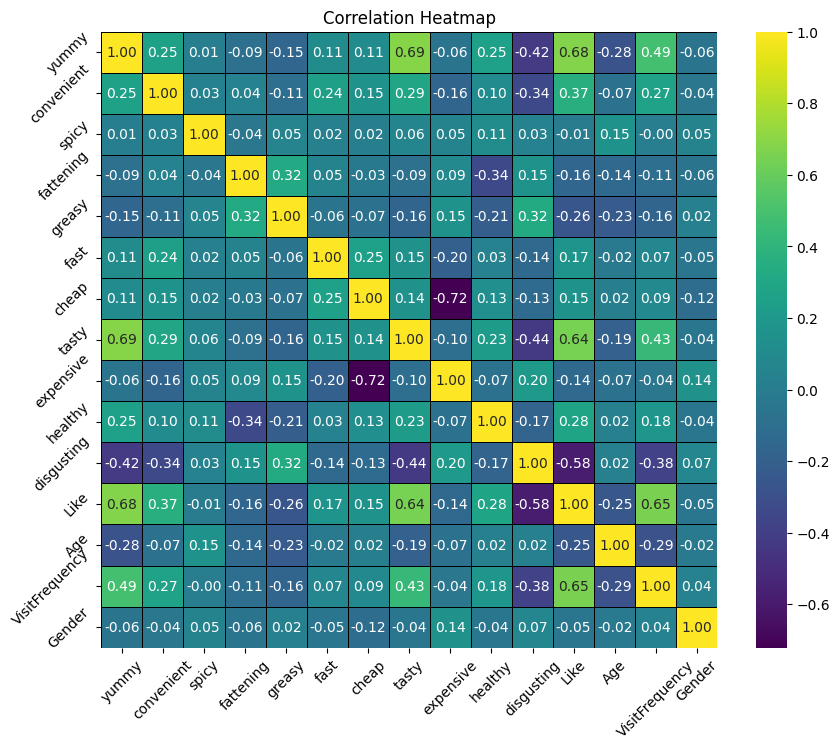

In [17]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, linecolor='black', square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlation Heatmap')
plt.show()

Applying PCA

In [18]:
from sklearn.decomposition import PCA

features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy','fast', 'cheap', 'tasty', 'expensive', 'healthy',
            'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']

x = df_updated[features].values

components_num = PCA(n_components=10)
pca_components = components_num.fit_transform(x)

pc_names = [f'pc{i}' for i in range(1, components_num.n_components_ + 1)]
df_pca = pd.DataFrame(data=pca_components, columns=pc_names)

In [19]:
df_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0.536036,-0.367464,0.535087,0.634775,-0.373761,0.189877,-0.317739,-0.284602,0.193041,0.172228
1,-0.304526,0.262201,-0.751569,0.303307,-0.055653,0.035530,-0.172409,0.049418,-0.004242,0.049604
2,0.278803,0.600410,-0.143373,0.577930,0.727753,0.847928,-0.938774,0.463913,0.227116,-0.249307
3,-0.333291,-0.383580,-0.824675,0.091246,0.214993,-0.594931,-0.119851,0.070360,-0.197287,0.083220
4,0.234390,-0.601645,0.142569,-0.645522,0.483315,0.904085,0.085526,-0.482271,0.266699,-0.106479


In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

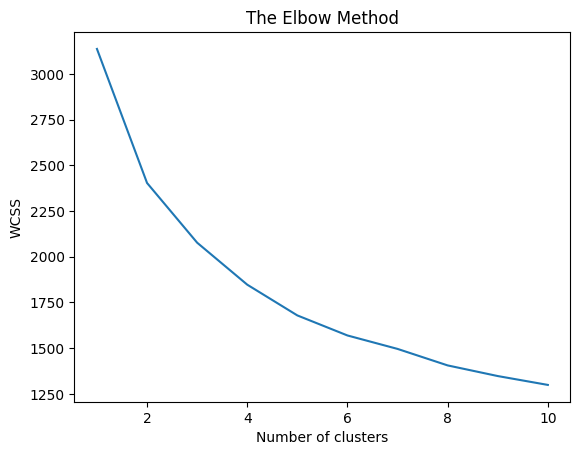

In [21]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

4 is the break point, so number of clustors is 4 for the optimized solution

In [22]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df_pca)
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


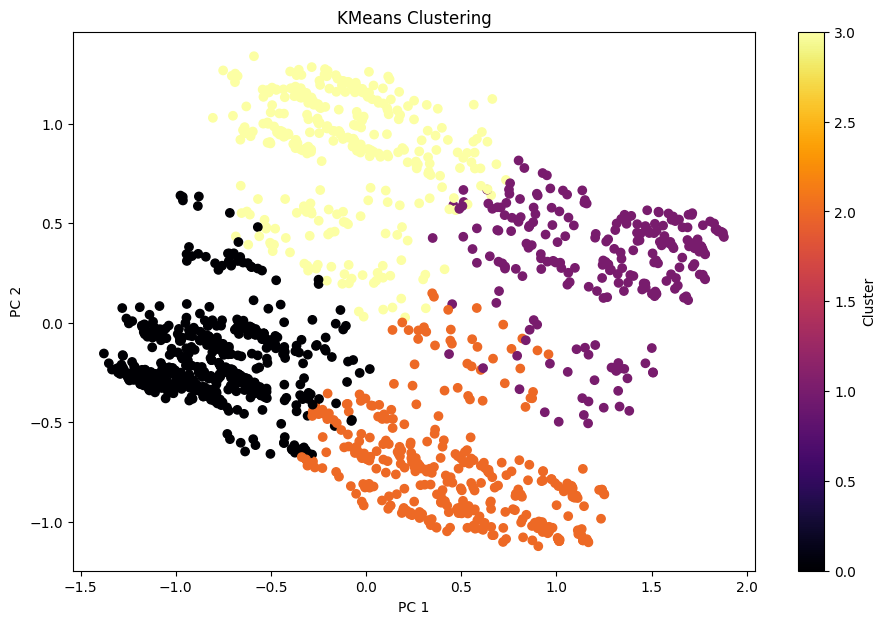

In [23]:
plt.figure(figsize=(11, 7))
plt.scatter(df_pca['pc1'], df_pca['pc2'], c=cluster_labels, cmap='inferno')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()

Now lets create a variable that will label the customers into clusters

In [24]:
df['Customer_ID'] = range(1, 1454)

In [25]:
cluster_df = pd.DataFrame({'Customer_ID': df['Customer_ID'], 'Customer_Labels': cluster_labels})

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(cluster_df)

      Customer_ID  Customer_Labels
0               1                2
1               2                3
2               3                3
3               4                0
4               5                2
5               6                0
6               7                3
7               8                0
8               9                1
9              10                3
10             11                2
11             12                3
12             13                2
13             14                3
14             15                1
15             16                0
16             17                0
17             18                3
18             19                1
19             20                3
20             21                3
21             22                3
22             23                3
23             24                3
24             25                0
25             26                3
26             27                0
27             28   

In [26]:
cluster_df.to_excel("/content/drive/MyDrive/Fenny Labs Intern/2/Result.xlsx")